## Preparación de datos

### Importaciones

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

### Carga del dataset

Leer en un dataframe de pandas el dataset contenido en el fichero **Automobile_price.csv** y Muestra las primeras 10 líneas.

In [2]:
from google.colab import drive
drive.mount('/content/drive')
DIRECTORIO = '/content/drive/MyDrive/CursoDL/datasets/' #  directorio de trabajo


Mounted at /content/drive


In [3]:
auto_prices = pd.read_csv(DIRECTORIO + 'auto_prices.csv')
auto_prices.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,8860,...,130,mpfi,3.47,2.68,900,111,5000,21,27,12495€
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,8860,...,130,mpfi,3.47,2.68,900,111,5000,21,27,15278€
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,9450,...,152,mpfi,2.68,3.47,900,154,5000,19,26,15278€
3,2,164,audi,gas,std,four,sedan,fwd,front,9980,...,109,mpfi,3.19,3.40,1000,102,5500,24,30,12917€
4,2,164,audi,gas,std,four,sedan,4wd,front,9940,...,136,mpfi,3.19,3.40,800,115,5500,18,22,16157€
5,2,?,audi,gas,std,two,sedan,fwd,front,9980,...,136,mpfi,3.19,3.40,850,110,5500,19,25,14120€
6,1,158,audi,gas,std,four,sedan,fwd,front,10580,...,136,mpfi,3.19,3.40,850,110,5500,19,25,16398€
7,1,?,audi,gas,std,four,wagon,fwd,front,10580,...,136,mpfi,3.19,3.40,850,110,5500,19,25,17519€
8,1,158,audi,gas,turbo,four,sedan,fwd,front,10580,...,131,mpfi,3.13,3.40,830,140,5500,17,20,22106€
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,9950,...,131,mpfi,3.13,3.40,700,160,5500,16,22,?


### Eliminación de las filas duplicadas

Mostrar las dimensiones del dataset antes y después de eliminar las filas repetidas:

In [4]:
print("Dimensiones del dataset con duplicados:",auto_prices.shape)
auto_prices.drop_duplicates(inplace=True)
print("Dimensiones del dataset sin duplicados:",auto_prices.shape)

Dimensiones del dataset con duplicados: (228, 26)
Dimensiones del dataset sin duplicados: (205, 26)


### Información del dataset
Mostrar la información del dataset ofrecida por las instrucciones *describe* e *info*.

In [5]:
auto_prices.info();

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   symboling          205 non-null    int64 
 1   normalized-losses  205 non-null    object
 2   make               205 non-null    object
 3   fuel-type          205 non-null    object
 4   aspiration         205 non-null    object
 5   num-of-doors       205 non-null    object
 6   body-style         205 non-null    object
 7   drive-wheels       205 non-null    object
 8   engine-location    205 non-null    object
 9   wheel-base         205 non-null    int64 
 10  length             205 non-null    int64 
 11  width              205 non-null    int64 
 12  height             205 non-null    int64 
 13  curb-weight        205 non-null    int64 
 14  engine-type        205 non-null    object
 15  num-of-cylinders   205 non-null    object
 16  engine-size        205 non-null    int64 
 17  fu

### Modificación de nombres de columnas

Se deben eliminar o sustituir los caracteres en los nombres de las columnas que puedan generar errores en Python. Por ejemplo `'-'` , '`,`' , '`*`' , '`/`' , '`|`' , '`>`' , '`<`' , '`@`' , '`!`' etc.

Recorrer los nombres de las columnas reemplazándo el carácter '`-`' por '`_`':

In [6]:
auto_prices.columns = [str.replace('-', '_') for str in auto_prices.columns]

### Valores ausentes (*missing values*)

En este dataset, los valores ausentes están representados por un signo de interrogación (?). Se deben reemplazar por `np.nan`.

In [7]:
auto_prices.replace("?", np.nan, inplace=True)

Mostrar cuantos valores ausentes (np.nan) hay en cada columna.

In [8]:
print(auto_prices.isnull().sum())

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64


Se debe eliminar la  columna normalize_losses ya que tiene muchos valores ausentes.

In [9]:
auto_prices.drop('normalized_losses', axis = 1, inplace = True)


Eliminar las filas que contengan `np.nan` y mostrar las dimensiones del dataset.

In [10]:
auto_prices.dropna(axis = 0, inplace = True)
auto_prices.shape

(193, 25)

Mostrar los tipos de todas las columnas.

In [11]:
auto_prices.dtypes

,0
symboling,int64
make,object
fuel_type,object
aspiration,object
num_of_doors,object
body_style,object
drive_wheels,object
engine_location,object
wheel_base,int64
length,int64


La columna *price* contiene valores en dólares y en euros. Unificar el precio en dólares omitiendo el símbolo $.

Mostrar las primeras filas para confirmar el cambio.

In [12]:
def unifica_moneda(fila):
  precio = fila.iloc[24]
  if fila.iloc[24].endswith("$"):
    return int(precio[:-1])
  else:
    return int(float(precio[:-1])*1.08)

auto_prices['price'] = auto_prices.apply(unifica_moneda, axis=1)
auto_prices.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,8860,16880,...,130,mpfi,3.47,2.68,900,111,5000,21,27,13494
1,3,alfa-romero,gas,std,two,convertible,rwd,front,8860,16880,...,130,mpfi,3.47,2.68,900,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,9450,17120,...,152,mpfi,2.68,3.47,900,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,9980,17660,...,109,mpfi,3.19,3.40,1000,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,9940,17660,...,136,mpfi,3.19,3.40,800,115,5500,18,22,17449


### Transformación del tipo de dato de las columnas

Las columnas *bore*, *stroke*, *horsepower* y *peak_rpm* se cargaron como tipo `object` en lugar de numéricas porque contenían el símbolo `?`.

Convertir dichas columnas a tipo numérico y mostrar los nuevos tipos.

In [13]:
cols = ["bore", "stroke", "horsepower", "peak_rpm"]
for column in cols:
    auto_prices[column] = pd.to_numeric(auto_prices[column])
auto_prices[cols].dtypes

,0
bore,float64
stroke,float64
horsepower,int64
peak_rpm,int64


### Feature engineering y transformación de variables

#### Agregación de variables categóricas

Calcular y mostrar la tabla de frecuencias de la columna `num_of_cylinders`. Interpreta el resultado.

In [14]:
auto_prices['num_of_cylinders'].value_counts()

,count
num_of_cylinders,
four,153
six,24
five,10
eight,4
three,1
twelve,1


Las categorías con muy pocas instancias (`three`, `five`, `eight` y `twelve`), son estadísticamente muy poco relevantes, por lo que se agregarán en un número menor de categorías: `three_four`, `five_six` y `eight_twelve`.

Mostrar las nuevas categorías y sus frecuencias.

In [15]:

cylinder_categories = {'three':'three_four', 'four':'three_four',
                    'five':'five_six', 'six':'five_six',
                    'eight':'eight_twelve', 'twelve':'eight_twelve'}

auto_prices.replace({'num_of_cylinders': cylinder_categories},inplace=True)
auto_prices['num_of_cylinders'].value_counts()


,count
num_of_cylinders,
three_four,154
five_six,34
eight_twelve,5


Mostrar con diagramas de cajas (*boxplot*) la distribución de precios para cada una de las tres categorias de la columna `num_of_cylinders`.

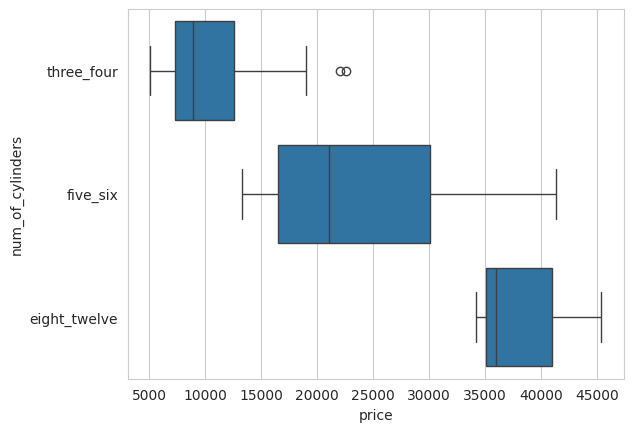

In [16]:
sns.set_style("whitegrid")
sns.boxplot(x='price', y='num_of_cylinders', data=auto_prices)
plt.xlabel('price')
plt.ylabel('num_of_cylinders');


Calcular la frecuencia de cada categoría de la columna 'body_style'.

In [17]:
auto_prices['body_style'].value_counts()

,count
body_style,
sedan,92
hatchback,63
wagon,24
hardtop,8
convertible,6


Dos de las categorías tienen un número bajo de ocurrencias. Estas categorías  se pueden agregar de forma similar a cómo se hizo con la columna '`num_of_cylinders`'.

Los valores '`hardtop`' y '`convertible`' se agruparán en '`hardtop_convert`.

In [18]:
body_cats = {'sedan':'sedan', 'hatchback':'hatchback', 'wagon':'wagon',
             'hardtop':'hardtop_convert', 'convertible':'hardtop_convert'}
auto_prices.replace({'body_style': body_cats},inplace=True)

auto_prices['body_style'].value_counts()

,count
body_style,
sedan,92
hatchback,63
wagon,24
hardtop_convert,14


Mostrar con diagramas de cajas (boxplot) la distribución de precios para cada una de las categorias de la columna `body_style`.

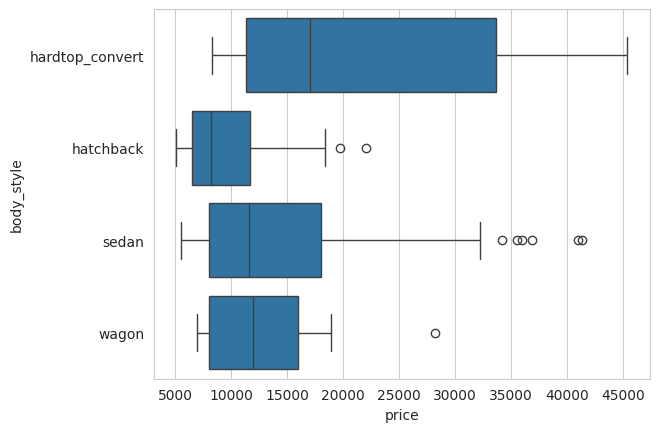

In [19]:
sns.boxplot(x='price', y='body_style', data=auto_prices)
plt.xlabel('price')
plt.ylabel('body_style');

Usar `matplotlib.cbook.boxplot_stats` para mostrar la información del precio del las filas con valor '*sedan*' en la columna '*body_style*'.

In [20]:
from matplotlib.cbook import boxplot_stats

sedan_prices = auto_prices[auto_prices['body_style']=='sedan']['price'].values
diccioStats=boxplot_stats(sedan_prices)
diccioStats

[{'mean': 14563.66304347826,
  'iqr': 10010.0,
  'cilo': 9941.025011501615,
  'cihi': 13217.974988498385,
  'whishi': 32250,
  'whislo': 5499,
  'fliers': array([41315, 36879, 35550, 36000, 34184, 40960]),
  'q1': 7990.0,
  'med': 11579.5,
  'q3': 18000.0}]

Usando el valor '`whishi`' recién calculado, eliminar las filas que tienen ese precio cuando en la columna '*body_style*' se encuentra el valor '*sedan*'.

In [21]:
limit = diccioStats[0]['whishi']
auto_prices = auto_prices.drop(auto_prices[(auto_prices['price']>= limit) & (auto_prices['body_style']=='sedan')].index)


Comprobar el efecto volviendo a mostrar el diagrama de cajas del precio en función de la columna '*body_style*'.

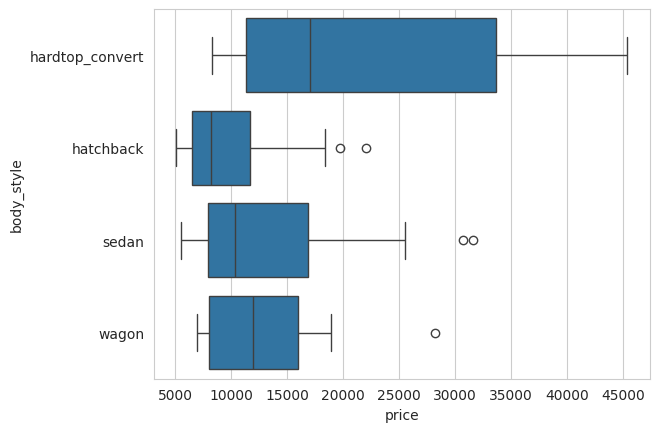

In [22]:
sns.boxplot(x='price', y='body_style', data=auto_prices)
plt.xlabel('price')
plt.ylabel('body_style');

### Mostrar un mapa de calor de las columnas numéricas


In [23]:
# Localizar el nombre de las columnas numéricas
cols = auto_prices.select_dtypes([np.number]).columns
print (list(cols))


['symboling', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']


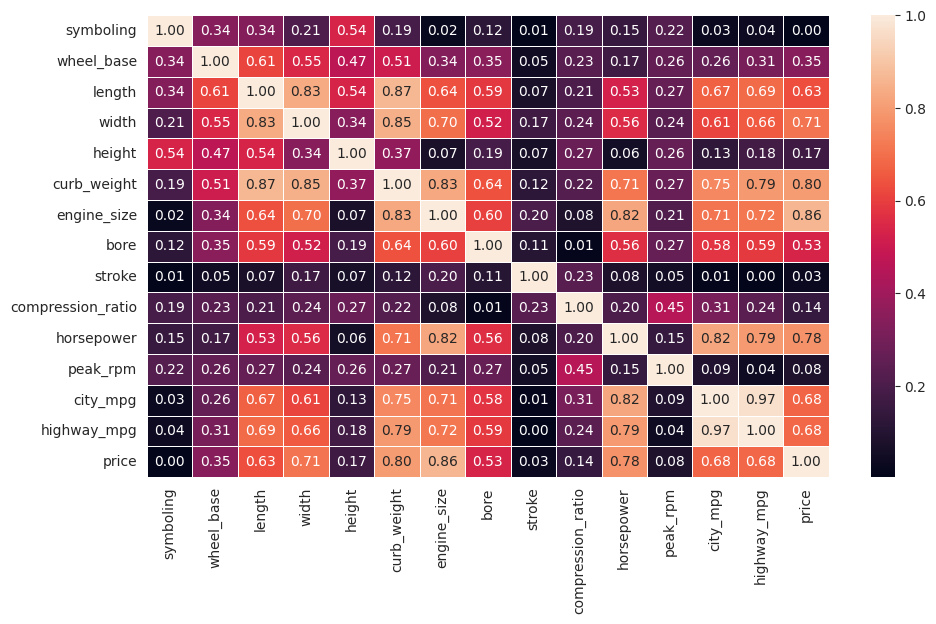

In [24]:
# Valores absolutos de las correlaciones
corr = auto_prices.select_dtypes([np.number]).corr().abs()

# Mapa de calor
f, ax = plt.subplots(figsize=(11, 6))
sns.heatmap(corr.abs(), annot=True, fmt=".2f", linewidths=.5, ax=ax);


### Guardar en un fichero *csv* el dataset preparado

In [25]:
auto_prices.to_csv('Auto_prices_prep.csv', index = False, header = True)